In [26]:
import json

from glob import glob
from constants import args, ROOT_PATH

from os import path

In [49]:
args.read_folder = '/data/original' # 'folder to read conversations'
args.partition = ''  # 'train', 'test', 'val'

# read data and create csqa data dict
# dict: partition -> folder -> file -> conversation
csqa_files = glob(f'{ROOT_PATH}{args.read_folder}/{args.partition}/*/*.json')
csqa_data = {}
print(f'Reading folders for partition {args.partition}')
for pth in csqa_files:
    pth = path.normpath(pth)
    folder = pth.rsplit('\\', 1)[0].rsplit('\\', 1)[-1]
    file = pth.rsplit('\\', 1)[-1]
    if folder not in csqa_data:
        csqa_data[folder] = {}

    with open(pth) as json_file:
        csqa_data[folder][file] = json.load(json_file)
print(f'Done, {len(csqa_data)} folders loaded!')

Reading folders for partition 
Done, 1 folders loaded!


In [50]:
print(f"USER: {csqa_data['QA_0']['QA_0.json'][0]}")
print(f"SYSTEM: {csqa_data['QA_0']['QA_0.json'][1]}")

USER: {'ques_type_id': 1, 'question-type': 'Simple Question (Direct)', 'description': 'Simple Question', 'entities_in_utterance': ['Q12122755'], 'relations': ['P495'], 'type_list': ['Q15617994'], 'speaker': 'USER', 'utterance': 'Which administrative territory is the country of origin of Frank and Jesse ?'}
SYSTEM: {'all_entities': ['Q30'], 'speaker': 'SYSTEM', 'entities_in_utterance': ['Q30'], 'utterance': 'United States of America', 'active_set': ['(Q12122755,P495,c(Q15617994))']}


In [51]:
print(f"USER.question-type: {csqa_data['QA_0']['QA_0.json'][0]['question-type']}")
print(f"USER.description: {csqa_data['QA_0']['QA_0.json'][0]['description']}")
print(f"SYSTEM.all_entities: {csqa_data['QA_0']['QA_0.json'][1]['all_entities']}")
print(f"SYSTEM.entities_in_utterance: {csqa_data['QA_0']['QA_0.json'][1]['entities_in_utterance']}")

USER.question-type: Simple Question (Direct)
USER.description: Simple Question
SYSTEM.all_entities: ['Q30']
SYSTEM.entities_in_utterance: ['Q30']


## Statistics on number of Question descriptions

In [88]:
from collections import Counter

args.read_folder = '/data/original' # 'folder to read conversations'
args.partition = ''  # 'train', 'test', 'val'

# read data and create csqa data dict
# dict: partition -> folder -> file -> conversation
data_folder = f'{ROOT_PATH}{args.read_folder}/{args.partition}'
csqa_files = glob(f'{data_folder}/*/*.json')
print(f'Reading folders for partition {args.partition}')

d_qt_desc = dict()

c_question_type = Counter()
c_description = Counter()

for pth in csqa_files:
    pth = path.normpath(pth)
    folder = pth.rsplit('\\', 1)[0].rsplit('\\', 1)[-1]
    file = pth.rsplit('\\', 1)[-1]

    with open(pth) as json_file:
        data_list = json.load(json_file)

    for entry in data_list:
        if entry['speaker'] == 'SYSTEM':
            continue

        # entry['speaker'] == 'USER':
        if entry['question-type'] not in d_qt_desc.keys():
            d_qt_desc[entry['question-type']] = Counter()

        c_question_type.update([entry['question-type']])
        if 'description' in entry.keys():
            c_description.update([entry['description']])
            d_qt_desc[entry['question-type']].update([entry['description']])

print(f'Done, folders loaded! Found {len(d_qt_desc.keys())} unique question-types and {len(c_description.keys())} uniqe descriptions.')

Reading folders for partition 
Done, folders loaded! Found 10 unique question-types and 45 uniqe descriptions.


In [85]:
import pandas
from matplotlib import pyplot as plt

df = pandas.DataFrame.from_dict(d_qt_desc)

In [86]:
df.to_csv(f'{data_folder}\\qt_desc_contingency.csv')

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

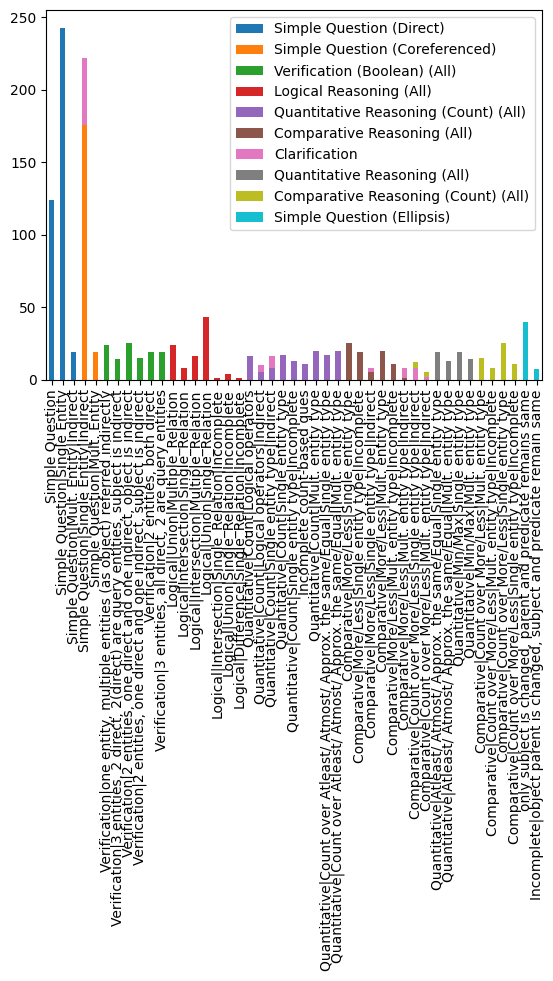

In [82]:
fig = plt.figure()
df.plot(kind="bar", stacked=True, legend=True)

In [84]:
fig.savefig(f'{data_folder}\\qt_desc_contingency.pdf')
fig.savefig(f'{data_folder}\\qt_desc_contingency.png', dpi=200)

In [61]:
print(c_question_type)
print(c_description)

Counter({'Simple Question (Direct)': 386,
         'Simple Question (Coreferenced)': 241,
         'Verification (Boolean) (All)': 116,
         'Logical Reasoning (All)': 97,
         'Quantitative Reasoning (Count) (All)': 140,
         'Comparative Reasoning (All)': 91,
         'Clarification': 79,
         'Quantitative Reasoning (All)': 65,
         'Comparative Reasoning (Count) (All)': 76,
         'Simple Question (Ellipsis)': 47})

In [67]:
print(d_qt_desc['Simple Question (Direct)'])
print(d_qt_desc['Simple Question (Coreferenced)'])
print(d_qt_desc['Simple Question (Ellipsis)'])

Counter({'Simple Question|Single Entity': 243, 'Simple Question': 124, 'Simple Question|Mult. Entity|Indirect': 19})
Counter({'Simple Question|Single Entity|Indirect': 176, 'Simple Question|Mult. Entity': 19})
Counter({'only subject is changed, parent and predicate remains same': 40, 'Incomplete|object parent is changed, subject and predicate remain same': 7})


## Testing the CSQADataset class

In [2]:
from dataset import CSQADataset
# load data
dataset = CSQADataset()
vocabs = dataset.get_vocabs()
# train_data, val_data, _ = dataset.get_data()
# train_helper, val_helper, _ = dataset.get_data_helper()

In [3]:
print(len(vocabs['logical_form'].freqs))
print(vocabs['logical_form'].freqs)

25
Counter({'type': 38020, 'relation': 35313, 'entity': 29931, 'filter_type': 22179, 'find': 20257, 'find_reverse': 8268, 'count': 6556, 'union': 4857, 'find_reverse_tuple_counts': 3881, 'find_tuple_counts': 2907, 'is_in': 2440, 'value': 1357, 'intersection': 1343, 'approx': 1169, 'filter_multi_types': 1132, 'less': 1054, 'prev_answer': 1034, 'greater': 931, 'argmax': 348, 'argmin': 316, 'atmost': 303, 'atleast': 299, 'equal': 241, 'difference': 57, 'insert': 1})


In [4]:
vocabs['ner'].freqs

Counter({'O': 522594,
         'B-Q838948': 2707,
         'I-Q838948': 8644,
         'B-Q15617994': 8427,
         'I-Q15617994': 10103,
         'B-Q2221906': 336,
         'I-Q2221906': 307,
         'B-Q18608583': 98,
         'I-Q18608583': 334,
         'B-Q502895': 22447,
         'I-Q502895': 73452,
         'B-Q6619679': 205,
         'I-Q6619679': 479,
         'B-Q290': 1160,
         'B-Q56061': 4319,
         'B-Q62447': 109,
         'I-Q62447': 417,
         'B-Q18142': 56,
         'I-Q18142': 165,
         'B-Q43229': 794,
         'I-Q43229': 2517,
         'I-Q56061': 5270,
         'B-Q349': 844,
         'I-Q349': 777,
         'B-Q1076486': 140,
         'I-Q1076486': 460,
         'B-Q12737077': 3141,
         'I-Q12737077': 5797,
         'B-Q2342494': 457,
         'I-Q2342494': 2683,
         'B-Q34770': 1020,
         'B-Q34379': 945,
         'B-Q201658': 97,
         'I-Q201658': 325,
         'B-Q12973014': 424,
         'I-Q12973014': 1406,
         'B-Q

In [ ]:
vocabs['coref'].freqs

In [ ]:
vocabs['input'].freqs

In [ ]:
len(vocabs['predicate_pointer'].freqs)